# Rejection Sample

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Example: Sampling a Gaussian
We want to sample a unit Gaussian: $\mathcal{N}(0, 1)$. 
In this case, we can set the unnormalized $p(x)$ as
$$\tilde{p}(x) = \exp(-x^2)$$
and select a simple uniform distribution
$$M q(x) = 1,$$ which satisfies $M q(x) \ge \tilde{p}(x)$ and is easy to sample.

In [2]:
def tilde_p(x): 
    return np.exp(-x**2)

We want to sample $x \sim q(x)$ and $u \sim \mathcal{U}(0,1)$

In [3]:
np.random.seed(1)

x = 6*np.random.uniform() - 3 # x sampled uniformly from -3 to 3
u = np.random.uniform()

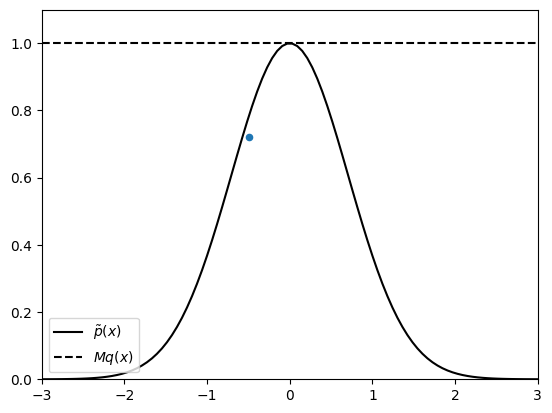

In [4]:
plt.plot(np.linspace(-3, 3, 100), tilde_p(np.linspace(-3, 3, 100)), label=r'$\tilde{p}(x)$', c='k', linestyle='-')
plt.plot(np.linspace(-3, 3, 100), np.ones(100), label='$M q(x)$', c='k', linestyle='--')

if (u > tilde_p(x) / 1.): # reject
    plt.scatter(x, u, c='C1', s=20)
else: 
    plt.scatter(x, u, c='C0', s=20)
plt.xlim(-3, 3)
plt.ylim(0., 1.1)
plt.legend(loc='lower left')

first sample is accepted

In [5]:
x = 6*np.random.uniform() - 3 # x sampled uniformly from -3 to 3
u = np.random.uniform()

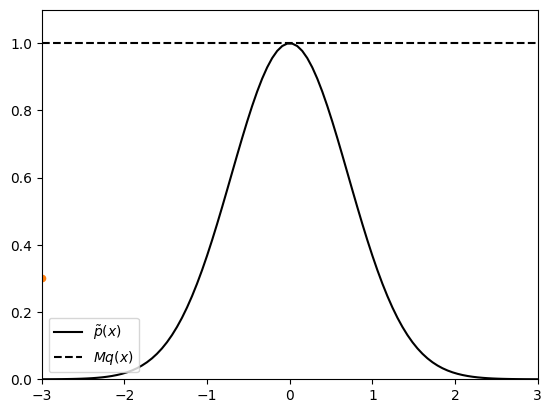

In [6]:
plt.plot(np.linspace(-3, 3, 100), tilde_p(np.linspace(-3, 3, 100)), label=r'$\tilde{p}(x)$', c='k', linestyle='-')
plt.plot(np.linspace(-3, 3, 100), np.ones(100), label='$M q(x)$', c='k', linestyle='--')

if (u > tilde_p(x) / 1.): # reject
    plt.scatter(x, u, c='C1', s=20)
else: 
    plt.scatter(x, u, c='C0', s=20)
plt.xlim(-3, 3)
plt.ylim(0., 1.1)
plt.legend(loc='lower left')

while the second sample is rejected. If we repeat this process $S$ times

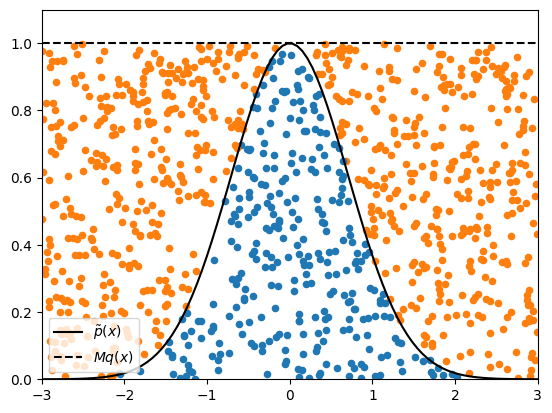

In [7]:
S = 1000

plt.plot(np.linspace(-3, 3, 100), tilde_p(np.linspace(-3, 3, 100)), label=r'$\tilde{p}(x)$', c='k', linestyle='-')
plt.plot(np.linspace(-3, 3, 100), np.ones(100), label='$M q(x)$', c='k', linestyle='--')


for i in range(S): 
    x = 6*np.random.uniform() - 3 # x sampled uniformly from -3 to 3
    u = np.random.uniform()

    if (u > tilde_p(x) / 1.): # reject
        plt.scatter(x, u, c='C1', s=20)
    else: 
        plt.scatter(x, u, c='C0', s=20)
plt.xlim(-3, 3)
plt.ylim(0., 1.1)
plt.legend(loc='lower left')

Lets scale it up

In [8]:
S = 100000 # S sample
x = 6*np.random.uniform(size=S) - 3
u = np.random.uniform(size=S)

reject = (u > tilde_p(x) / 1.)
accept = ~reject

samples = x[accept]

(array([1.000e+00, 0.000e+00, 4.000e+00, 4.000e+00, 1.100e+01, 2.200e+01,
        3.200e+01, 7.400e+01, 1.300e+02, 2.230e+02, 3.530e+02, 5.320e+02,
        6.760e+02, 9.190e+02, 1.257e+03, 1.521e+03, 1.865e+03, 2.112e+03,
        2.332e+03, 2.451e+03, 2.438e+03, 2.417e+03, 2.178e+03, 1.964e+03,
        1.577e+03, 1.240e+03, 9.820e+02, 6.840e+02, 4.850e+02, 3.650e+02,
        2.010e+02, 1.280e+02, 7.200e+01, 3.900e+01, 2.000e+01, 8.000e+00,
        4.000e+00, 2.000e+00, 1.000e+00, 0.000e+00]),
 array([-3.  , -2.85, -2.7 , -2.55, -2.4 , -2.25, -2.1 , -1.95, -1.8 ,
        -1.65, -1.5 , -1.35, -1.2 , -1.05, -0.9 , -0.75, -0.6 , -0.45,
        -0.3 , -0.15,  0.  ,  0.15,  0.3 ,  0.45,  0.6 ,  0.75,  0.9 ,
         1.05,  1.2 ,  1.35,  1.5 ,  1.65,  1.8 ,  1.95,  2.1 ,  2.25,
         2.4 ,  2.55,  2.7 ,  2.85,  3.  ]),
 <BarContainer object of 40 artists>)

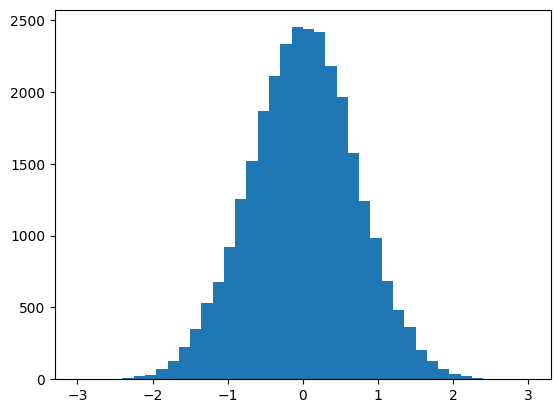

In [9]:
plt.hist(samples, range=(-3, 3), bins=40)